<a href="https://colab.research.google.com/github/isabellehaga/7days-library-data/blob/main/_7DaysOfCode_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [107]:
import numpy as np
import pandas as pd
!pip install requests
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
import plotly.graph_objects as go


In [108]:
#Para ler Parquet, o Pandas precisa do pyarrow ou fastparquet
!pip install pyarrow

!pip install fastparquet


#Day 1 - #7DaysOfCode

Objetivos do Trabalho

1. Importar os dados referentes aos últimos 10 anos de:

    *   Empréstimos dos acervos das bibliotecas da UFRN;
    *   Exemplares do acervo.

2. Unificar os dados em um único DataFrame, integrando as diferentes tabelas disponíveis para facilitar a análise.
3. Construir a base de transações, iniciando pelos dados de empréstimos, que fornecem informações sobre as movimentações do acervo.
4. Mesclar os dados de empréstimos com os dados do acervo, utilizando a coluna de código de barras como chave de relacionamento, a fim de obter informações adicionais, como biblioteca de origem do material e área temática.
5. Realizar a limpeza dos dados, tratando valores nulos, inconsistências e registros duplicados para garantir maior qualidade e confiabilidade nas análises.
6. Criar duas versões do DataFrame:
   * Um completo (df_completo) contendo todos os registros, inclusive aqueles com valores nulos;
   * Outro (df_sem_nan) excluindo os registros que possuem valores nulos nas colunas do acervo, permitindo análises comparativas e maior consistência.

## Importando os dados

In [109]:
# Importando "Empréstimos dos acervos das bibliotecas de UFRN"
url_api = "https://api.github.com/repos/isabellehaga/7_Days_of_Code_Alura-Python-Pandas/contents/Dia_1-Importando_dados/Datasets/dados_emprestimos"

resposta = requests.get(url_api)
arquivos = resposta.json()  # lista de dicionários

# Pegar os links Raw de todos os CSVs
links_raw = [arquivo['download_url'] for arquivo in arquivos if arquivo['name'].endswith('.csv')]
print(links_raw)

# Carregar todos os arquivos CSV em um único DataFrame
dfs = [pd.read_csv(link) for link in links_raw]
dados_emprestimos = pd.concat(dfs, ignore_index=True)

# Conferir o resultado
print(dados_emprestimos.shape)
dados_emprestimos.head()


['https://raw.githubusercontent.com/isabellehaga/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20101.csv', 'https://raw.githubusercontent.com/isabellehaga/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20102.csv', 'https://raw.githubusercontent.com/isabellehaga/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20111.csv', 'https://raw.githubusercontent.com/isabellehaga/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20112.csv', 'https://raw.githubusercontent.com/isabellehaga/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20121.csv', 'https://raw.githubusercontent.com/isabellehaga/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20122.csv', 'https://raw.githubusercont

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [110]:
# Garantindo que importou todos os arquivos
# Verificar quantas linhas cada arquivo trouxe
for i, df in enumerate(dfs):
    print(f"Arquivo {i+1}: {df.shape[0]} linhas")

# Total de linhas somando os arquivos
total_linhas = sum(df.shape[0] for df in dfs)
print(f"Total de linhas somando todos os arquivos: {total_linhas}")


Arquivo 1: 95357 linhas
Arquivo 2: 100696 linhas
Arquivo 3: 108547 linhas
Arquivo 4: 120813 linhas
Arquivo 5: 132606 linhas
Arquivo 6: 117431 linhas
Arquivo 7: 135090 linhas
Arquivo 8: 124196 linhas
Arquivo 9: 113181 linhas
Arquivo 10: 122129 linhas
Arquivo 11: 126738 linhas
Arquivo 12: 98115 linhas
Arquivo 13: 118733 linhas
Arquivo 14: 107179 linhas
Arquivo 15: 118714 linhas
Arquivo 16: 110326 linhas
Arquivo 17: 107065 linhas
Arquivo 18: 95015 linhas
Arquivo 19: 95839 linhas
Arquivo 20: 83687 linhas
Arquivo 21: 26561 linhas
Total de linhas somando todos os arquivos: 2258018


In [111]:
# Garantindo que importou todos os arquivos
dados_emprestimos.tail()   # últimas 5 linhas

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
2258013,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258014,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258015,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258016,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO
2258017,2989090,2013106838,NaN,2020/06/09 11:54:02.852000000,2021/07/21 15:33:45.000000000,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO


In [112]:
# Importando "Exemplares do acervo das bibliotecas de UFRN"
# URL Raw do arquivo Parquet
url_acervo = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'

# Carregar o arquivo em um DataFrame
acervo = pd.read_parquet(url_acervo)

# Conferir o resultado
print(acervo.shape)


(546237, 7)


In [113]:
acervo.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [114]:
# Informações gerais
print(dados_emprestimos.info())
print(acervo.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 120.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  

In [115]:
# Checar duplicatas
print(dados_emprestimos.duplicated().sum())
print(acervo.duplicated().sum())

37
0


In [116]:
# Deletando valores duplicado
emprestimos = dados_emprestimos.drop_duplicates()
# Checar duplicatas novamente
print(emprestimos.duplicated().sum())

0


In [117]:
# Checar valores nulos
print(emprestimos.isnull().sum())

print(acervo.isnull().sum())

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285709
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape         3170
tipo_vinculo_usuario          0
dtype: int64
id_exemplar         0
codigo_barras       0
colecao             0
biblioteca          0
status_material     0
localizacao         0
registro_sistema    0
dtype: int64


## Unificando os dados de empréstimo e Acervo

In [118]:
df_completo = pd.merge(emprestimos, acervo, on='codigo_barras', how='left')

df_completo.head(2)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0


In [119]:
# Ver quantos códigos de barras de empréstimos não existem no acervo
df_emprestimos_sem_acervo = emprestimos[~emprestimos['codigo_barras'].isin(acervo['codigo_barras'])]
print(df_emprestimos_sem_acervo.shape[0])

# Essa grande quantidade de empréstimos sem conrrespondência nos emprestimos evidencia que o catálogo acervos precisa ser atualizado com mais frenquencia.
# Vamos fazer a analise com ambos sem os dados de acervo e com dados de acervo.


189257


In [120]:
# DF completo com os dados de emprestimos sem correspondênica do acervo
df_completo.shape

(2261779, 13)

In [121]:
# Criar df sem linhas com NaN nas colunas de acervo
colunas_acervo = ['id_exemplar', 'colecao', 'biblioteca', 'status_material', 'localizacao']
df_sem_nan = df_completo.dropna(subset=colunas_acervo)

# Conferir o shape
print(df_sem_nan.shape)


(2072522, 13)


In [122]:
# Número de linhas antes e depois
linhas_antes = df_completo.shape[0]
linhas_depois = df_sem_nan.shape[0]

print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"Linhas removidas: {linhas_antes - linhas_depois}")


Linhas antes: 2261779
Linhas depois: 2072522
Linhas removidas: 189257


## Salvando

In [123]:
# Salvar o DataFrame completo (com NaN)
df_completo.to_csv('df_completo.csv', index=False)

# Salvar o DataFrame sem NaN
df_sem_nan.to_csv('df_sem_nan.csv', index=False)

print("Arquivos salvos com sucesso!")


Arquivos salvos com sucesso!


#Day 2 - #7DaysOfCode

Objetivos

1. Preparar os dados para análise:

   * Garantir que as colunas tenham o tipo correto e que os registros estejam consistentes.
    * Excluir dados irrelevantes:
2. Remover a coluna registro_sistema, que não contribui para a análise.
3. Padronizar formatos de dados:
4. Transformar a coluna matricula_ou_siape em formato string, garantindo consistência e legibilidade.
5. Atribuir contexto às informações:
    
   * Criar a coluna classe_CDU a partir da coluna localizacao, mapeando cada código para a respectiva classe geral da Classificação Decimal Universal (CDU).
   * Tratar os valores nulos, atribuindo “Não informado” quando necessário.

In [124]:
# Excluindo coluna 'registro_sistema
df_completo = df_completo.drop(columns=['registro_sistema'])
df_sem_nan = df_sem_nan.drop(columns=['registro_sistema'])

# Verificando df_completo
print("df_completo:")
display(df_completo.head())

# Verificando df_sem_nan
print("df_sem_nan:")
display(df_sem_nan.head())


df_completo:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0


df_sem_nan:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0


In [125]:
# Transformando a coluna 'matricula_ou_siape' em string
df_completo['matricula_ou_siape'] = df_completo['matricula_ou_siape'].astype(str)
df_sem_nan ['matricula_ou_siape'] = df_sem_nan['matricula_ou_siape'].astype(str)

# Verificando df_completo
print("df_completo:")
display(df_completo.head())

# Verificando df_sem_nan
print("df_sem_nan:")
display(df_sem_nan.head())


df_completo:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0


df_sem_nan:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0


In [126]:
def cdu_classe(codigo):
    if pd.isna(codigo):  # trata valores NaN
        return 'Não informado'
    codigo = int(codigo)  # garante que o código seja inteiro
    if 0 <= codigo <= 99:
        return 'Generalidades. Ciência e conhecimento'
    elif 100 <= codigo <= 199:
        return 'Filosofia e psicologia'
    elif 200 <= codigo <= 299:
        return 'Religião'
    elif 300 <= codigo <= 399:
        return 'Ciências sociais'
    elif 400 <= codigo <= 499:
        return 'Classe vaga. Provisoriamente não ocupada'
    elif 500 <= codigo <= 599:
        return 'Matemática e ciências naturais'
    elif 600 <= codigo <= 699:
        return 'Ciências aplicadas'
    elif 700 <= codigo <= 799:
        return 'Belas artes'
    elif 800 <= codigo <= 899:
        return 'Linguagem. Língua. Linguística'
    elif 900 <= codigo <= 999:
        return 'Geografia. Biografia. História'
    else:
        return 'Código inválido'

In [127]:
# Criando uma nova coluna 'classe_CDU' e aplicando a função anterior
df_completo['classe_CDU'] = df_completo['localizacao'].apply(cdu_classe)
df_sem_nan['classe_CDU'] = df_sem_nan['localizacao'].apply(cdu_classe)

# Verificando df_completo
print("df_completo:")
display(df_completo.head())

# Verificando df_sem_nan
print("df_sem_nan:")
display(df_sem_nan.head())

df_completo:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas


df_sem_nan:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas


# Day 3 - #7DaysOfCode

Objetivos:
1. Analisar a evolução anual dos empréstimos:
    * Verificar a quantidade total de exemplares emprestados por ano.
    * Plotar um gráfico de linhas para identificar tendências (aumento, diminuição ou estabilidade).

2. Analisar a distribuição mensal dos empréstimos:   
    * Gerar uma tabela com a quantidade total de exemplares emprestados por mês.
    * Plotar um gráfico de linhas para identificar os meses de maior e menor demanda.
    * Auxiliar no planejamento de férias e atividades da equipe da biblioteca.
3. Analisar a distribuição diária dos empréstimos:
    * Verificar os horários com maior quantidade de empréstimos ao longo do dia.
    * Plotar um gráfico de barras para identificar os horários de pico e os períodos mais adequados para atividades administrativas ou que não envolvam atendimento ao usuário.
4. Fornecer insights para gestão:
    * Apoiar decisões sobre programação anual, mensal e diária das atividades da biblioteca com base na demanda real de empréstimos

In [128]:
# Transformando a coluna 'data_emprestimo' em formato datetime
df_completo['data_emprestimo'] = pd.to_datetime(df_completo['data_emprestimo'])
df_sem_nan['data_emprestimo'] = pd.to_datetime(df_sem_nan['data_emprestimo'])

# Criar uma coluna 'chama ano_emprestimo' onde add o valor de ano da coluna 'data_emprestimo'
df_completo['ano_emprestimo'] = df_completo['data_emprestimo'].dt.year
df_sem_nan['ano_emprestimo'] = df_sem_nan['data_emprestimo'].dt.year

# Verificando df_completo
print("df_completo:")
display(df_completo.head())

# Verificando df_sem_nan
print("df_sem_nan:")
display(df_sem_nan.head())

df_completo:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU,ano_emprestimo
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas,2010
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas,2010
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas,2010
3,709687,L184117,2010/01/18 11:07:46.470000000,2010-01-04 08:24:21.284,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas,2010
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010-01-04 08:27:33.569,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas,2010


df_sem_nan:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU,ano_emprestimo
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas,2010
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas,2010
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas,2010
3,709687,L184117,2010/01/18 11:07:46.470000000,2010-01-04 08:24:21.284,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas,2010
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010-01-04 08:27:33.569,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas,2010


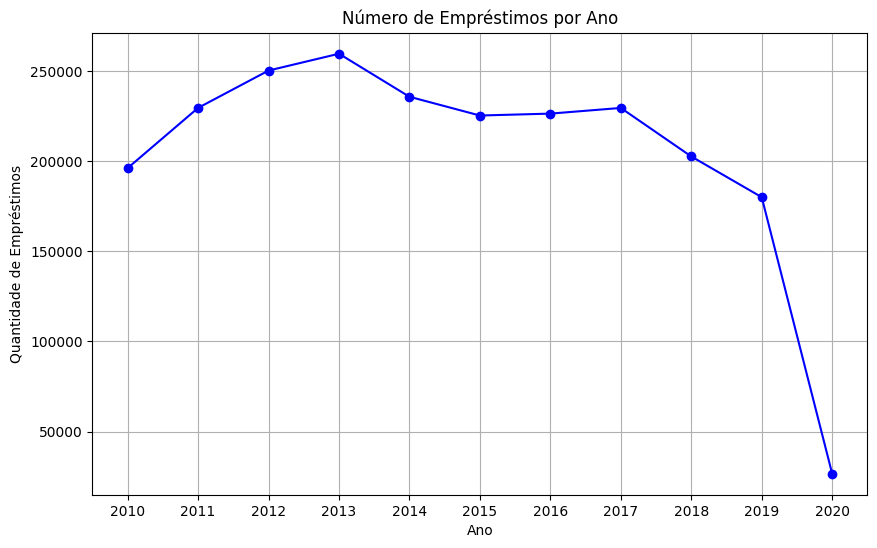

In [129]:
# Contar o número de empréstimos por ano
emprestimos_por_ano = df_completo.groupby('ano_emprestimo').size()

#Gerando o grafico Matplotlib
plt.figure(figsize=(10,6))
plt.plot(emprestimos_por_ano.index, emprestimos_por_ano.values, marker='o', color='blue')
plt.title('Número de Empréstimos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Empréstimos')
plt.grid(True)
plt.xticks(emprestimos_por_ano.index)  # garante que todos os anos apareçam no eixo x
plt.show()



In [130]:
# Contagem de empréstimos por ano
emprestimos_por_ano = df_completo.groupby('ano_emprestimo').size().reset_index(name='quantidade')

#Gerando o gráfico via seaborn
fig_ano = px.line(emprestimos_por_ano, x='ano_emprestimo', y='quantidade',
                  title='Número de Empréstimos por Ano',
                  markers=True)
fig_ano.show()


In [131]:
# Verificando df_completo
print("df_completo:")
display(df_completo.tail())

# Verificando df_sem_nan
print("df_sem_nan:")
display(df_sem_nan.tail())

# Queda brusca no ano de 2020 pode ter-se dado pelo fato do DF até somente metade do ano.

df_completo:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU,ano_emprestimo
2261774,2989086,2008047044,NaN,2020-05-05 19:51:06.059,2021/05/13 14:53:31.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256297.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,684.0,Ciências aplicadas,2020
2261775,2989087,2008047047,NaN,2020-05-05 19:51:06.135,2021/05/13 14:53:38.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256406.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,628.0,Ciências aplicadas,2020
2261776,2989088,2010052905,NaN,2020-05-05 19:51:06.164,2021/05/13 15:01:46.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,807821.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,653.0,Ciências aplicadas,2020
2261777,2989089,2010048023,NaN,2020-06-09 11:54:02.669,2021/07/21 15:33:55.000000000,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,804885.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,675.0,Ciências aplicadas,2020
2261778,2989090,2013106838,NaN,2020-06-09 11:54:02.852,2021/07/21 15:33:45.000000000,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,1099777.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,14.0,Generalidades. Ciência e conhecimento,2020


df_sem_nan:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU,ano_emprestimo
2261774,2989086,2008047044,NaN,2020-05-05 19:51:06.059,2021/05/13 14:53:31.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256297.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,684.0,Ciências aplicadas,2020
2261775,2989087,2008047047,NaN,2020-05-05 19:51:06.135,2021/05/13 14:53:38.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256406.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,628.0,Ciências aplicadas,2020
2261776,2989088,2010052905,NaN,2020-05-05 19:51:06.164,2021/05/13 15:01:46.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,807821.0,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,653.0,Ciências aplicadas,2020
2261777,2989089,2010048023,NaN,2020-06-09 11:54:02.669,2021/07/21 15:33:55.000000000,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,804885.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,675.0,Ciências aplicadas,2020
2261778,2989090,2013106838,NaN,2020-06-09 11:54:02.852,2021/07/21 15:33:45.000000000,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,1099777.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,14.0,Generalidades. Ciência e conhecimento,2020


In [132]:
# Gerar um data frame sem o ano 2020
df_sem_2020 = df_completo[df_completo['ano_emprestimo'] != 2020]


# Agrupando por ano
emprestimos_por_ano = df_sem_2020.groupby('ano_emprestimo').size().reset_index(name='quantidade')

fig = px.line(emprestimos_por_ano, x='ano_emprestimo', y='quantidade',
              title='Número de Empréstimos por Ano (excluindo 2020)',
              markers=True)
fig.show()



Mesmo sem os regiistros do ano de 2020 que está incompleto na fonte fornecida, o gráfico indica um queda entre 2013 e 2014, 2015, 2018 e 2019.

Vamos avaliar isso proporcionalmente.

In [133]:
# Diferença percentual em relação ao ano anterior
emprestimos_por_ano['variacao_pct'] = emprestimos_por_ano['quantidade'].pct_change() * 100

# Substituir NaN da primeira linha (ano inicial) por 0
emprestimos_por_ano['variacao_pct'] = emprestimos_por_ano['variacao_pct'].fillna(0)

fig = px.line(
    emprestimos_por_ano,
    x='ano_emprestimo',
    y='variacao_pct',
    title='Variação Percentual de Empréstimos Ano a Ano',
    markers=True,
    text=emprestimos_por_ano['variacao_pct'].round(2),  # valores arredondados
    labels={'variacao_pct':'Variação (%)', 'ano_emprestimo':'Ano'}
)

fig.update_traces(textposition='top center')
fig.show()





Infelizmente o número de empréstimos aparentemente têm caído ao longo dos anos, tanto em número reais quanto proporcionais. O ano de 2013 onde teve o maior número de empréstimos ainda não foi atingido em 2019 (7 anos depois)


In [134]:
# Gerar um DF com o número de exemplares emprestador por mês para melhor gerenciar os recursos humanos da biblioteca

# Extrair o mês da data de empréstimo
df_completo['mes_num'] = df_completo['data_emprestimo'].dt.month
df_completo['mes_nome'] = df_completo['mes_num'].apply(lambda x: calendar.month_abbr[x])

df_completo.head(2)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU,ano_emprestimo,mes_num,mes_nome
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas,2010,1,Jan
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas,2010,1,Jan


In [135]:
fig = go.Figure(data=[go.Table(
    columnwidth=[80, 150],  # controla a largura das colunas
    header=dict(
        values=["Mês", "Quantidade de Exemplares Emprestados"],
        fill_color='lightblue',
        align='center',
        font=dict(size=12, color='black')
    ),
    cells=dict(
        values=[
            emprestimos_por_mes['Mês'],
            emprestimos_por_mes['quantidade'].map("{:,.0f}".format)  # adiciona separador de milhar
        ],
        fill_color=[['white','lightgrey']*6],  # alterna cores
        align='center',
        font=dict(size=12)
    )
)])

# Layout compacto
fig.update_layout(
    title='Tabela de Empréstimos por Mês',
    width=420,   # largura ajustada
    height=500   # altura ajustada
)

fig.show()


In [136]:
# Agrupar por mês e garantir todos os meses na ordem correta
emprestimos_por_mes = df_completo.groupby('mes_nome').size() \
    .reindex(list(calendar.month_abbr[1:]), fill_value=0) \
    .reset_index(name='quantidade')

# Renomear coluna para facilitar
emprestimos_por_mes.rename(columns={'mes_nome':'Mês'}, inplace=True)

fig = px.line(
    emprestimos_por_mes,
    x='Mês',
    y='quantidade',
    title='Número de Exemplares Emprestados por Mês',
    markers=True,
    text=emprestimos_por_mes['quantidade'],
    labels={'quantidade':'Exemplares Emprestados'}
)

# Posicionar os valores acima dos pontos
fig.update_traces(textposition='top center')

fig.show()


O objetivo do gráfico acima é auxiliar no gerenciamento dos recursos humanos da biblioteca, por exemplo, para organizar a programação de férias ou planejar atividades que não envolvam atendimento ao público nos meses de menor demanda.

No gráfico, é possível identificar que os meses mais indicados para isso, em ordem crescente de menor demanda, são: janeiro, dezembro, julho e junho, coincidindo com o período de férias universitárias.

In [137]:
# Iremos analisar quais são os horarios com maior quantidade de empréstimos

# Extrair a hora do empréstimo
df_completo['hora_emprestimo'] = df_completo['data_emprestimo'].dt.hour

# Agrupar por hora
emprestimos_por_hora = df_completo.groupby('hora_emprestimo').size().reset_index(name='quantidade')

# Gráfico de barras
fig = px.bar(
    emprestimos_por_hora,
    x='hora_emprestimo',
    y='quantidade',
    title='Número de Exemplares Emprestados por Hora do Dia',
    labels={'hora_emprestimo': 'Hora do Dia', 'quantidade': 'Exemplares Emprestados'},
    text='quantidade'
)

# Melhorar visual
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis=dict(dtick=1))  # garante todas as horas no eixo x

fig.show()


In [138]:
# Como não é possível ter ocorrido empréstimos as 00:00 ou as 23:00 eu substitui esses valores por NA
# Substituir horas 0 ou 23 por valor ausente
df_completo['hora_emprestimo'] = df_completo['hora_emprestimo'].replace([0, 23], pd.NA)


In [139]:
# Conferir se a substituição funcionou
print(df_completo['hora_emprestimo'].isna().sum())


116


In [140]:
# Refazendo o gráfico sem os valores de NAN
# Filtrar apenas horas válidas (ignora NaN)
df_horas_validas = df_completo.dropna(subset=['hora_emprestimo'])

# Agrupar por hora
emprestimos_por_hora = df_horas_validas.groupby('hora_emprestimo').size().reset_index(name='quantidade')

# Gráfico de barras
fig = px.bar(
    emprestimos_por_hora,
    x='hora_emprestimo',
    y='quantidade',
    title='Número de Exemplares Emprestados por Hora do Dia',
    labels={'hora_emprestimo':'Hora do Dia', 'quantidade':'Exemplares Emprestados'},
    text='quantidade'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis=dict(dtick=1))

fig.show()


In [141]:
# Calcular o máximo
max_emprestimos = emprestimos_por_hora['quantidade'].max()

# Definir limiar de 10% do máximo
limiar_10pct = max_emprestimos * 0.3

# Criar coluna indicando horários seguros (<10% do pico)
emprestimos_por_hora['horario_seguro'] = emprestimos_por_hora['quantidade'] < limiar_10pct

# Gráfico de barras
fig = px.bar(
    emprestimos_por_hora,
    x='hora_emprestimo',
    y='quantidade',
    color='horario_seguro',
    color_discrete_map={True: 'green', False: 'lightgrey'},  # verde = seguro, cinza = não seguro
    title='Número de Exemplares Emprestados por Hora (horários seguros destacados)',
    labels={'hora_emprestimo':'Hora do Dia', 'quantidade':'Exemplares Emprestados'},
    text='quantidade'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis=dict(dtick=1), showlegend=False)

fig.show()



Além do gerenciamento anual das atividades, a diretoria também precisa planejar a programação diária. Por esse motivo, foi verificado quais horários possuem a maior quantidade de empréstimos ao longo de um dia.

O gráfico de barras destaca em verde as horas que correspondem a menos de 30% do horário com maior número de empréstimos. Com isso, os horários mais seguros para planejar atividades que não envolvam atendimento ao usuário seriam antes das 08h e após as 21h.

# Day 4 - #7DaysOfCode

Objetivos

1. Explorar variáveis categóricas dos empréstimos:

    * Analisar a distribuição dos empréstimos por tipo de vínculo dos usuários.
    * Avaliar quais coleções são mais emprestadas.
    * Identificar as bibliotecas com maior ou menor número de empréstimos.
    * Verificar a distribuição por classe geral da CDU (temas dos exemplares).

2. Gerar tabelas de frequência e percentuais:
    * Criar tabelas que mostrem a contagem e a proporção de cada categoria dentro das variáveis analisadas.
    * Automatizar o processo por meio da criação de funções reutilizáveis para gerar essas tabelas.

3. Fornecer insights para a gestão da biblioteca:
    * Entender o perfil do público e seu comportamento de empréstimo.
    * Ranquear coleções e bibliotecas para otimizar estratégias de gestão do acervo.
    * Identificar os temas mais procurados para orientar ações de marketing e divulgação do acervo

*Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?*

Os alunos de graduação representam 78,3% dos empréstimos de exemplares. Em seguida, vêm os alunos de pós-graduação, com 14,1%, e os professores, com apenas 3,4%. Esses três grupos correspondem a 95,95% dos tipos de vínculo que mais utilizam a biblioteca. Os restantes 4,05% se distribuem entre servidores técnico-administrativos, alunos do ensino médio, professores externos, usuários externos e outros.

In [145]:
# Agrupar por tipo de vínculo
emprestimos_vinculo = df_completo.groupby('tipo_vinculo_usuario').size().reset_index(name='quantidade')

# Calcular percentual
emprestimos_vinculo['percentual'] = round(emprestimos_vinculo['quantidade'] / emprestimos_vinculo['quantidade'].sum() * 100, 2)

# Ordenar de forma ascendente
emprestimos_vinculo = emprestimos_vinculo.sort_values(by='quantidade', ascending=True)

# Gráfico de barras horizontais
fig_vinculo = px.bar(
    emprestimos_vinculo,
    x='quantidade',
    y='tipo_vinculo_usuario',
    orientation='h',
    text='percentual',
    title='Distribuição de Empréstimos por Tipo de Vínculo (Ascendente)',
    labels={'quantidade':'Quantidade de Empréstimos', 'tipo_vinculo_usuario':'Tipo de Vínculo'}
)

# Adicionar percentuais sobre as barras
fig_vinculo.update_traces(texttemplate='%{text}%', textposition='outside')

fig_vinculo.show()


*Quais coleções são mais emprestadas?*

O Acervo Circulante corresponde a 99,06% do total de empréstimos da biblioteca. O restante, 0,94%, é composto por diversas outras coleções, como Multimeios, Monografias, Dissertações, Obras de Referência, entre outras.

In [152]:
# Agrupar por coleção
emprestimos_colecao = df_completo.groupby('colecao').size().reset_index(name='quantidade')

# Calcular percentual
emprestimos_colecao['percentual'] = round(emprestimos_colecao['quantidade'] / emprestimos_colecao['quantidade'].sum() * 100, 2)

# Ordenar do maior para o menor
emprestimos_colecao = emprestimos_colecao.sort_values(by='quantidade', ascending=False)

# Gráfico de barras verticais
fig_colecao = px.bar(
    emprestimos_colecao,
    x='colecao',
    y='quantidade',
    text='percentual',
    title='Distribuição de Empréstimos por Coleção',
    labels={'colecao':'Coleção', 'quantidade':'Quantidade de Empréstimos'}
)

# Adicionar percentuais sobre as barras
fig_colecao.update_traces(texttemplate='%{text}%', textposition='outside')

# Ajustar layout para melhor visualização
fig_colecao.update_layout(xaxis_tickangle=-45)

fig_colecao.show()


In [153]:
emprestimos_colecao

,colecao,quantidade,percentual
0,Acervo Circulante,2053120,99.06
8,Multimeios,7954,0.38
7,Monografias,4021,0.19
3,Dissertações,2406,0.12
11,Obras de Referência,1954,0.09
13,Publicações de Autores do RN,866,0.04
12,Publicações da UFRN,764,0.04
14,Teses,714,0.03
5,Folhetos,271,0.01
9,Necessidades Educacionais Específicas,130,0.01


In [154]:
# Filtrar removendo 'Acervo Circulante'
df_colecao_filtrada = df_completo[df_completo['colecao'] != 'Acervo Circulante']

# Agrupar por coleção
emprestimos_colecao_filtrado = df_colecao_filtrada.groupby('colecao').size().reset_index(name='quantidade')

# Calcular percentual
emprestimos_colecao_filtrado['percentual'] = round(emprestimos_colecao_filtrado['quantidade'] / emprestimos_colecao_filtrado['quantidade'].sum() * 100, 2)

# Ordenar do maior para o menor
emprestimos_colecao_filtrado = emprestimos_colecao_filtrado.sort_values(by='quantidade', ascending=False)

# Gráfico de barras verticais
fig_colecao = px.bar(
    emprestimos_colecao_filtrado,
    x='colecao',
    y='quantidade',
    text='percentual',
    title='Distribuição de Empréstimos por Coleção (excluindo Acervo Circulante)',
    labels={'colecao':'Coleção', 'quantidade':'Quantidade de Empréstimos'}
)

# Adicionar percentuais sobre as barras
fig_colecao.update_traces(texttemplate='%{text}%', textposition='outside')

# Ajustar layout
fig_colecao.update_layout(xaxis_tickangle=-45)

fig_colecao.show()


In [156]:
emprestimos_colecao_filtrado

,colecao,quantidade,percentual
7,Multimeios,7954,41.00
6,Monografias,4021,20.72
2,Dissertações,2406,12.40
10,Obras de Referência,1954,10.07
12,Publicações de Autores do RN,866,4.46
11,Publicações da UFRN,764,3.94
13,Teses,714,3.68
4,Folhetos,271,1.40
8,Necessidades Educacionais Específicas,130,0.67
14,Trabalho Acadêmico,115,0.59


*Quais são as bibliotecas com mais ou menos quantidade de empréstimos?*

A Universidade Federal do Rio Grande do Norte (UFRN) tem 22 bibliotecas e a que têm maior número de empréstimo é Biblioteca Central Zila Mamede com 1.426.122 de empréstimo e a com menor número de empréstimo é a Biblioteca Setorial do Núcleo de Ensino Superior do Agreste NESA Nova Cruz com 617 empréstimos.

In [163]:
df_completo['biblioteca'].nunique()

22

In [160]:
# Agrupar por biblioteca
emprestimos_biblioteca = df_completo.groupby('biblioteca').size().reset_index(name='quantidade')

# Ordenar do maior para o menor
emprestimos_biblioteca = emprestimos_biblioteca.sort_values(by='quantidade', ascending=False)

# Top 10
top_10 = emprestimos_biblioteca.head(10)
fig_top = px.bar(
    top_10,
    y='biblioteca',
    x='quantidade',
    text='quantidade',
    orientation='h',
    title='10 Bibliotecas com mais Empréstimos',
    labels={'biblioteca':'Biblioteca', 'quantidade':'Quantidade de Empréstimos'},
    color_discrete_sequence=['blue']
)
fig_top.update_traces(textposition='outside')
fig_top.update_layout(yaxis={'categoryorder':'total ascending'})

# Bottom 10
bottom_10 = emprestimos_biblioteca.tail(10)
fig_bottom = px.bar(
    bottom_10,
    y='biblioteca',
    x='quantidade',
    text='quantidade',
    orientation='h',
    title='10 Bibliotecas com menos Empréstimos',
    labels={'biblioteca':'Biblioteca', 'quantidade':'Quantidade de Empréstimos'},
    color_discrete_sequence=['red']
)
fig_bottom.update_traces(textposition='outside')
fig_bottom.update_layout(yaxis={'categoryorder':'total ascending'})

# Exibir os gráficos
fig_top.show()
fig_bottom.show()



*De quais temas da CDU são os exemplares emprestados?*  

As Ciências aplicadas (63,02%)	e as Ciências sociais (16,34)	são as classes CDU mais emprestadas representando cerca de 79,3% do total de empréstimos.

In [176]:
# Contagem de empréstimos por classe CDU
emprestimos_cdu = df_completo.groupby('classe_CDU').size().reset_index(name='quantidade')

# Ordenar do mais emprestado para o menos
emprestimos_cdu = emprestimos_cdu.sort_values(by='quantidade', ascending=False)

# Calcular percentual
emprestimos_cdu['percentual'] = round(emprestimos_cdu['quantidade'] / emprestimos_cdu['quantidade'].sum() * 100, 2)

# Exibir tabela
emprestimos_cdu

,classe_CDU,quantidade,percentual
1,Ciências aplicadas,1425473,63.02
2,Ciências sociais,369536,16.34
8,Não informado,189257,8.37
7,Matemática e ciências naturais,68744,3.04
4,Generalidades. Ciência e conhecimento,62521,2.76
9,Religião,62295,2.75
3,Filosofia e psicologia,60563,2.68
5,Geografia. Biografia. História,7989,0.35
0,Belas artes,7911,0.35
6,Linguagem. Língua. Linguística,7490,0.33


In [175]:
# Criar tabela
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Classe CDU", "Quantidade de Empréstimos", "Percentual (%)"],
        fill_color='lightblue',
        align='center',
        font=dict(size=12, color='black')
    ),
    cells=dict(
        values=[emprestimos_cdu['classe_CDU'], emprestimos_cdu['quantidade'], emprestimos_cdu['percentual']],
        fill_color=[['white','lightgrey']*len(emprestimos_cdu)],
        align='center',
        font=dict(size=11)
    )
)])

fig.update_layout(title='Empréstimos por Classe CDU')

fig.show()


In [174]:
# Agrupar e ordenar
emprestimos_cdu = df_completo.groupby('classe_CDU').size().reset_index(name='quantidade')
emprestimos_cdu = emprestimos_cdu.sort_values(by='quantidade', ascending=False)

# Gráfico de barras vertical
fig = px.bar(
    emprestimos_cdu,
    x='classe_CDU',
    y='quantidade',
    text='quantidade',
    title='Empréstimos por Classe CDU',
    labels={'classe_CDU':'Classe CDU', 'quantidade':'Quantidade de Empréstimos'},
    color='quantidade',
    color_continuous_scale='Blues'
)

# Ajustar limite do eixo Y para não cortar os números
fig.update_layout(yaxis=dict(range=[0, emprestimos_cdu['quantidade'].max() * 1.15]))
fig.show()


*Gere uma tabela de frequência e com o percentual para cada variável.*

In [177]:
def tabela_frequencia(df, coluna):
    """
    Gera uma tabela com contagem e percentual para uma coluna categórica.

    Parâmetros:
    df (DataFrame): DataFrame com os dados
    coluna (str): Nome da coluna categórica

    Retorna:
    DataFrame com colunas: 'Categoria', 'Quantidade', 'Percentual (%)'
    """
    freq = df[coluna].value_counts(dropna=False)  # conta valores, incluindo NaN
    perc = round((freq / freq.sum()) * 100, 2)   # calcula percentual
    tabela = pd.DataFrame({
        'Categoria': freq.index,
        'Quantidade': freq.values,
        'Percentual (%)': perc.values
    })
    return tabela


In [178]:
# Exemplo: frequência por tipo de vínculo
tabela_tipo_vinculo = tabela_frequencia(df_completo, 'tipo_vinculo_usuario')
tabela_tipo_vinculo


,Categoria,Quantidade,Percentual (%)
0,ALUNO DE GRADUAÇÃO,1771903,78.34
1,ALUNO DE PÓS-GRADUAÇÃO,320074,14.15
2,DOCENTE,78285,3.46
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,34178,1.51
4,ALUNO MÉDIO/TÉCNICO,29986,1.33
5,DOCENTE EXTERNO,24606,1.09
6,USUÁRIO EXTERNO,2741,0.12
7,OUTROS,6,0.00


In [179]:
# Exemplo: frequência por coleção
tabela_colecao = tabela_frequencia(df_completo, 'colecao')
tabela_colecao


,Categoria,Quantidade,Percentual (%)
0,Acervo Circulante,2053120,90.77
1,NaN,189257,8.37
2,Multimeios,7954,0.35
3,Monografias,4021,0.18
4,Dissertações,2406,0.11
5,Obras de Referência,1954,0.09
6,Publicações de Autores do RN,866,0.04
7,Publicações da UFRN,764,0.03
8,Teses,714,0.03
9,Folhetos,271,0.01


In [182]:
# Exemplo: frequência por classe CDU
tabela_classe_CDU	 = tabela_frequencia(df_completo, 'classe_CDU')
tabela_classe_CDU


,Categoria,Quantidade,Percentual (%)
0,Ciências aplicadas,1425473,63.02
1,Ciências sociais,369536,16.34
2,Não informado,189257,8.37
3,Matemática e ciências naturais,68744,3.04
4,Generalidades. Ciência e conhecimento,62521,2.76
5,Religião,62295,2.75
6,Filosofia e psicologia,60563,2.68
7,Geografia. Biografia. História,7989,0.35
8,Belas artes,7911,0.35
9,Linguagem. Língua. Linguística,7490,0.33


In [183]:
# Exemplo: frequência por biblioteca
tabela_biblioteca	 = tabela_frequencia(df_completo, 'biblioteca')
tabela_biblioteca


,Categoria,Quantidade,Percentual (%)
0,Biblioteca Central Zila Mamede,1426122,63.05
1,NaN,189257,8.37
2,Biblioteca Setorial do Centro Ciências da Saúd...,118614,5.24
3,Biblioteca Setorial da Faculdade de Ciências d...,77609,3.43
4,Biblioteca Setorial Prof. Alberto Moreira Camp...,66447,2.94
5,Biblioteca Setorial Profª. Maria Lúcia da Cost...,61478,2.72
6,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,46040,2.04
7,Biblioteca Setorial do Centro de Ciências Huma...,40744,1.80
8,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,32097,1.42
9,Biblioteca Setorial Profª. Maria José Mamede G...,29089,1.29


In [180]:
df_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_CDU,ano_emprestimo,mes_num,mes_nome,hora_emprestimo
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas,2010,1,Jan,7
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas,2010,1,Jan,7
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas,2010,1,Jan,8
3,709687,L184117,2010/01/18 11:07:46.470000000,2010-01-04 08:24:21.284,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas,2010,1,Jan,8
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010-01-04 08:27:33.569,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas,2010,1,Jan,8


# Day 5
